## Binairy Classification Pizza or not Pizza
We will train 3 different models to binairy classify wether or not the picture has a pizza in it

## Model1
Logistic Regression: This is a simple and widely used binary classification model that uses a logistic function to model a binary dependent variable.

## Model2
Support Vector Machines (SVM): SVM is a powerful and flexible class of supervised algorithms for both classification and regression. In binary classification, it separates data points using a hyperplane with the largest amount of margin.

## Model3
Decision Trees: Decision trees classify instances by sorting them down the tree from the root to some leaf node, which provides the classification of the instance. The node's decision rule is picked to optimize some measure of impurity among the training instances that reach the node.

## Prediction
I think all models would not fit the task quite well because they are built for features and not images, a neural network like CNN would do a much better job. Nevertheless i still want to find out which model would have the best predicions on wether or not an image contains a pizza.

## Imports

In [5]:
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

## Load the images

In [6]:
# Define the parameters for the image data generator
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Define the directory where the images are stored
image_directory = '.' # '.' To declare the current folder

# The generator will read images from the directory and assign labels based on subdirectories
train_generator = datagen.flow_from_directory(
    image_directory,
    target_size=(150, 150),  # Resize the images to 150x150 pixels
    batch_size=64,
    class_mode='binary',  # Because you have two classes, pizza and not pizza
    subset='training')  # Set as training data

validation_generator = datagen.flow_from_directory(
    image_directory,  # same directory as training data
    target_size=(150, 150),
    batch_size=64,
    class_mode='binary',
    subset='validation')  # set as validation data


Found 1574 images belonging to 2 classes.


Found 392 images belonging to 2 classes.


## Visualize the data

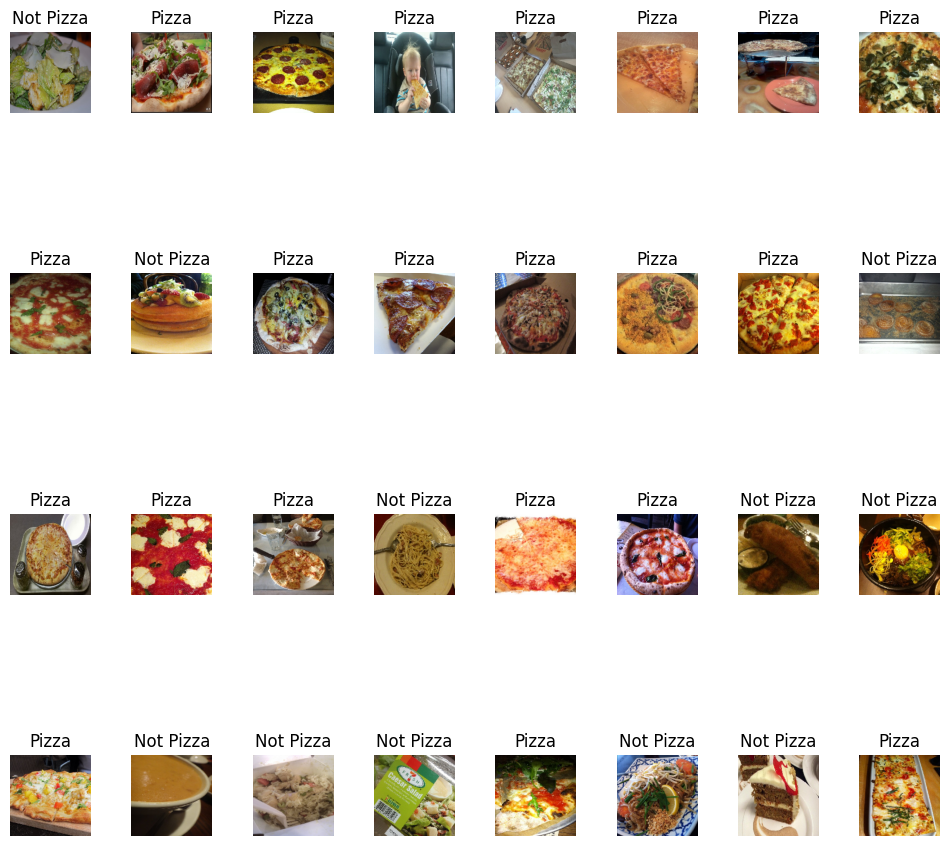

In [7]:
# Get the class labels
class_labels = train_generator.class_indices

# Get the first batch of images and labels
images, labels = next(train_generator)

# Define the number of rows and columns for the plot
rows, cols = 4, 8

# Initialize the plot
fig, ax = plt.subplots(rows, cols, figsize=(12,12))
ax = ax.ravel()

for i in range(0, rows*cols): # create a grid with 4 rows and 8 columns
    ax[i].imshow(images[i]) # plot the image
    if labels[i] == 1.0:
        label = 'Pizza'
    else:
        label = 'Not Pizza'
    ax[i].set_title(label) # set the class as title
    ax[i].axis('off') # remove the axes

plt.subplots_adjust(wspace=0.5) # adjust the space between the images
plt.show() # display the plot


Logistic Regression accuracy:  0.625
SVM accuracy:  0.53125
Decision Tree accuracy:  0.578125


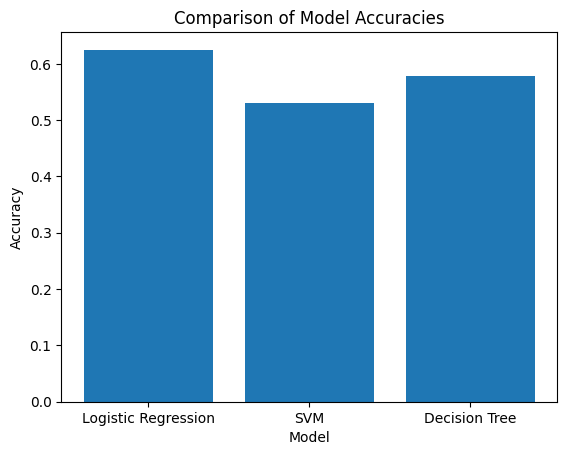

Logistic Regression accuracy:  0.578125
SVM accuracy:  0.53125
Decision Tree accuracy:  0.609375


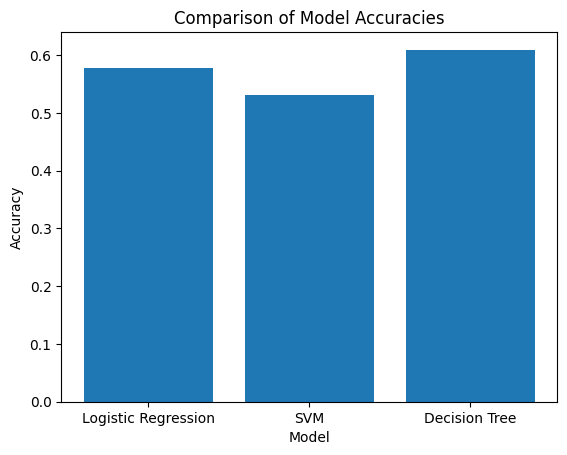

Logistic Regression accuracy:  0.65625
SVM accuracy:  0.625
Decision Tree accuracy:  0.390625


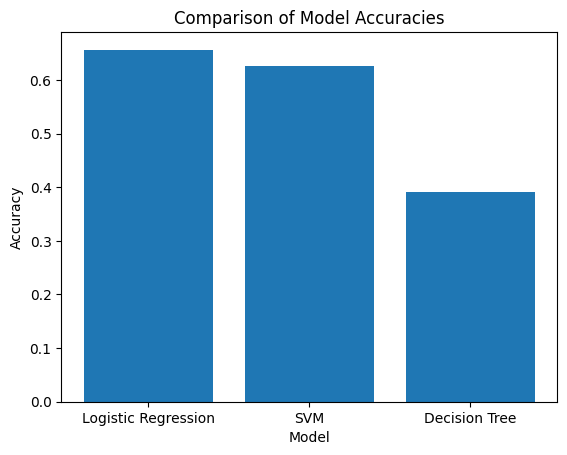

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import numpy as np

for x in range(3):
    # Instantiate the models
    models = [LogisticRegression(max_iter=1000), svm.SVC(), DecisionTreeClassifier()]
    model_names = ['Logistic Regression', 'SVM', 'Decision Tree']
    accuracies = []

    # Get the images and labels from the generator
    X_train, y_train = next(train_generator)
    X_val, y_val = next(validation_generator)
    # Convert the images to numpy arrays for the models
    X_train = np.array(X_train).reshape(X_train.shape[0], -1)
    X_val = np.array(X_val).reshape(X_val.shape[0], -1)

    # Flatten the images for the models
    X_train = X_train.reshape(X_train.shape[0], -1)
    X_val = X_val.reshape(X_val.shape[0], -1)

    # Train each model and record their accuracies
    for model, name in zip(models, model_names):
        model.fit(X_train, y_train)
        score = model.score(X_val, y_val)
        accuracies.append(score)
        print(f'{name} accuracy: ', score)

    # Plot the accuracies
    plt.bar(model_names, accuracies)
    plt.xlabel('Model')
    plt.ylabel('Accuracy')
    plt.title('Comparison of Model Accuracies')
    plt.show()


## Summary

## Results
All models show a quite bad result at deciding wether or not an image contains a pizza, they all share a similar accuracy percentage of rougly between 0.5 and 0.7 , i've ran the models multiple times which proves the result is not a one time occurance.

## Conclusion
I did expect the results to be a bit better eventhough these models are not built for this task, but they all did a bad job at deciding wether or not an image contained a pizza. The models were close to just guessing instead of learning. Overall they learned such a small bit that they do have the favor in guessing the answer. As expected is a neural network like CNN a much better approach